# Recap

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 

In our last notebook, we covered the basics about a perceptron:

In [23]:
def step(x):
    if x<0:
        return 0
    return 1

trainingData = [
    #([input values], expected classes)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.5

w = np.random.rand(2)
b = random.random()

while True:
    old_w = w
    old_b = b
    
    for i in range(len(trainingData)):
        x, di = trainingData[i]
        yi = x[0] * w[0] + x[1] * w[1] + b
        error = di - step(yi)
        w = w + learningRate * error * np.array(x)
        b = b + learningRate * error

        print("inputs: ", x, "\tweights:\t", w, "\tbias:\t", b)
    
    if((old_w == w).all() and old_b == b):
        print("Success!")
        break;

inputs:  [0, 0] 	weights:	 [ 0.87258713  0.00123648] 	bias:	 -0.03578737071471361
inputs:  [0, 1] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 0.4642126292852864
inputs:  [1, 0] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 0.4642126292852864
inputs:  [1, 1] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 0.4642126292852864
inputs:  [0, 0] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [0, 1] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [1, 0] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [1, 1] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [0, 0] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [0, 1] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [1, 0] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
inputs:  [1, 1] 	weights:	 [ 0.87258713  0.50123648] 	bias:	 -0.03578737071471361
Success!


# Plots

In [7]:
def plotPerceptron():
    # Puntos:
    inputs = [i[0] for i in trainingData]
    colors = [i[1] for i in trainingData]
    x = [i[0] for i in inputs]
    y = [i[1] for i in inputs]
    minX, maxX = np.array(x).min() - .1, np.array(x).max() + .1
    minY, maxY = np.array(y).min() - .1, np.array(y).max() + .1

    plt.ylim(minY, maxY)
    plt.xlim(minX, maxX)
    plt.scatter(x, y, c=colors, cmap="bwr")

    w1, w2 = w
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    line_x_coords = np.array([-1, x+1])
    line_y_coords = c * line_x_coords + d

    plt.plot(line_x_coords, line_y_coords)
    plt.show()

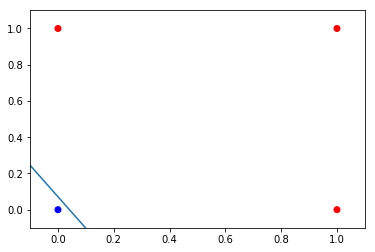

In [24]:
plotPerceptron()

# Mejoras
Algunos puntos importantes que revisamos durante este proceso:

## Random weights

Los pesos anteriormente partieron en cero. <br>
Esto implica que siempre que se entrene este sistema con los mismos valores de entrada, se llegará al mismo resultado. <br>
Esto puede ser negativo en algunos casos y se recomienda iniciar los pesos con valores random:

`w = random.rand(2)`

`b = random.random()`

In [12]:
w = np.random.rand(2)
b = random.random()
print("weights:\t\t", w)
print("bias:\t\t\t", b)

weights:		 [ 0.61656278  0.32528571]
bias:			 0.6223595128694391


**Implemented**

In [68]:
trainingData = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.2

w = np.random.rand(2)
print("weights:\t\t", w)
b = random.random()
print("bias:\t\t\t", b)

x, di = trainingData[i]
print("inputs (xi):\t\t", x)
print("expected (di):\t\t", di)

yi = x[0] * w[0] + x[1] * w[1] + b
print("output (yi):\t\t", yi)

error = di - step(yi)
print("error (di-step(yi)):\t", error)

w = w + learningRate * error * np.array(x)
print("new weigth:\t\t", w)

b = b + learningRate * error
print("new bias:\t\t", b)

weights:		 [ 0.15635308  0.21891553]
bias:			 0.10548450420896882
inputs (xi):		 [1, 1]
expected (di):		 1
output (yi):		 0.480753115649
error (di-step(yi)):	 0
new weigth:		 [ 0.15635308  0.21891553]
new bias:		 0.105484504209


## Producto Punto

En vez de realizar la multiplicación de las variables de entrada por los pesos de forma manual:

`yi = xi[0] * w[0] + xi[1] * w[1] + b`
    
Se hará el producto punto:

`yi = np.dot(w, x) + b`

In [11]:
# Valores ejemplo
x = [0, 1]
w = np.random.rand(2)

# Calculo de forma explícita:
yi = x[0] * w[0] + x[1] * w[1] + b
print("math yi:\t\t", yi)

# Calculo con producto punto:
yi = np.dot(w, x) + b
print("dot yi:\t\t\t", yi)

math yi:		 0.469514682536
dot yi:			 0.469514682536


**Implemented**

In [30]:
trainingData = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.2

w = np.random.rand(2)
print("weights:\t\t", w)
b = random.random()
print("bias:\t\t\t", b)

x, di = trainingData[i]
print("inputs (xi):\t\t", x)
print("expected (di):\t\t", di)

yi = np.dot(w, x) + b
print("output (yi):\t\t", yi)

error = di - step(yi)
print("error (di-step(yi)):\t", error)

w = w + learningRate * error * np.array(x)
print("new weigth:\t\t", w)

b = b + learningRate * error
print("new bias:\t\t", b)

weights:		 [ 0.00696555  0.19022055]
bias:			 0.07734880261049037
inputs (xi):		 [1, 1]
expected (di):		 1
output (yi):		 0.274534907547
error (di-step(yi)):	 0
new weigth:		 [ 0.00696555  0.19022055]
new bias:		 0.07734880261049037
